In [ ]:
## Install this libraries 
pip install feature-engine
pip install category_encoders

### 1. Creating binary variables through one-hot encoding

In [ ]:
import pandas as pd 
from sklearn.preprocessing import OneHotEncoder
## Sckit-learn
encoder = OneHotEncoder(categories='auto',drop='first' , sparse=False)
encoder.fit_transform(df)
## By pandas 
pd.get_dummies(df,drop_first=True)

- Scikit-learn's OneHotEncoder() function will only encode the categories learned from the train set. 
- If there are new categories in the test set, we can instruct the encoder to ignore them or to return an error with the
- handle_unknown='ignore' argument or the handle_unknown='error' argument, respectively.


In [ ]:
## Feature Engine Overcomes the limitation of sckit-learn and pandas get dummies : 
--> it wil give output as dataframe not array like sckit -learn 
--> it retains the information from train dataset 
--> we can specify the column names  

from feature_engine.encoding import OneHotEncoder
ohe_enc = OneHotEncoder(top_categories=None, drop_last=True)
## feature engine detects categories automatically 
## we can also give variables inside onhot encoder for performing imputation on columns 
## top_categories=None means we wants to take all columns and it will detect categories automatically




### 2. Performing one-hot encoding of frequent categories
- In this technique we perform imputation of most frequent categories only 

In [ ]:
from feature_engine.encoding import OneHotEncoder
ohe_enc = OneHotEncoder(top_categories=5, drop_last=True,variables=column_names)
ohe_enc.fit_transform(df)
## Top 5 categories will be encoded only and rest will be encoded as 0 
## same operation can be done with Sckit-learn 
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(max_categories=3, sparse=False)


### 3. Replacing categories with ordinal numbers


In [ ]:
from sklearn.preprocessing import OrdinalEncoder
from feature_engine.encoding import OrdinalEncoder
## by sckit-learn 
ohc = OrdinalEncoder()
ohc.fit_transform() --> This returns a numpy array 
## By Feature Engine 
ohc = OrdinalEncoder(encoding_method='arbitrary', variables=categorical_columns)
phc.fit_transform()


### 4. Replacing categories with counts or frequency of observations
#### (Count or Frequency Encoding ) 
- This technique is quit famous and important one 
- if 10 out of 100 observations show the category blue for the variable color, we would replace blue with 10 when doing count encoding, or by 0.1 if performing frequency encoding
- In count or frequency encoding, we replace the categories with the count or the percentage of observations with that category.
- Note that if two different categories are present in the same percentage of observations, they will be replaced by the same value, which may lead to information loss.


In [ ]:
## Feature-engine Library : 
from feature_engine.encoding import CountFrequencyEncoder
## replacing with count 
encoding = CountFrequencyEncoder(encoding_method='count',variables=None)
## replacing with percentage (frequency)
encoding = CountFrequencyEncoder(encoding_method='frequency',variables=None)
encoding.fit_transform(df.dropna())

### 5. Encoding with integers in an ordered manner(Linear Models) 
1. Calculate the mean value of the target per category.(groupby(columns))
2. Order the categories from the one with the lowest to the one with the highest target mean value.
3. Assign digits to the ordered categories, starting with 0 to the first category all of the way up to k-1 to the last category, where k is the number of distinct categories.
4. This method is used for linear models because previous method wont work well

In [ ]:
from feature_engine.encoding import OrdinalEncoder
ordin = OrdinalEncoder(encoding_method='ordered',variables=None)
ordin.fit_transform(X,Y)

## pandas code 
{j:i for i,j in enumerate(df.groupby(df['A6']).mean()['A15'].sort_values().index)}
output --> {'ff': 0, 'dd': 1, 'j': 2, 'v': 3, 'bb': 4, 'n': 5, 'o': 6, 'h': 7, 'z': 8}
'A15' --> It is a target column 
'A6' --> It is a feature column

### 6. Encoding with the mean of the target
- Mean encoding or target encoding implies replacing the categories with the average target value for that category. For example, if we have a City variable, with the categories of London, Manchester, and Bristol, and we want to predict the default rate; if the default rate for London is 30%, we replace London with 0.3; if the default rate for Manchester is 20%, we replace Manchester with 0.2; and so on. The same can be done with a continuous target

In [ ]:
from feature_engine.encoding import MeanEncoder
meanenc = MeanEncoder(variables=None)
meanenc.fit_transform(x,y) 
## Pandas code : 
df['A6'].map(df.groupby(df['A6']).mean()['A15'].to_dict())

### 7. Encoding with the Weight of Evidence
- The Weight of Evidence (WoE) was developed primarily for credit and financial industries to facilitate variable screening and exploratory analysis and to build more predictive linear models to evaluate the risk of loan default; that is, to predict how likely money lent to a person or institution is to be lost.

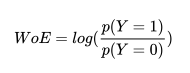

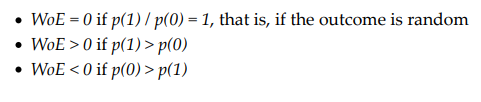

- This allows for a direct visualization of the predictive power of the category in the variable: the higher the WoE, the more likely the event will occur, and in fact, if the W0E is positive, the event is likely to occur

In [ ]:
from feature_engine.encoding import WoEEncoder

## pandas : 
p1 = df.groupby(['A0'])['A15'].mean() ## A15 is target column 
p0 = 1-p1 
woe = dict(np.log(p1 / p0))
ouput --> {'a': -0.13353139262452263, 'b': -0.2404683349715158}

## By feature Engine : 
woe_encoder = WoEEncoder()
woe_encoder.fit_transform(x,y)



### 8. Grouping rare or infrequent categories 
- Rare values are those categories that are present only in a small percentage of the observations. There is no rule of thumb to determine how small is a small percentage, but typically, any value below 5 % can be considered rare. Infrequent labels often appear only on the train set or only on the test set, therefore making the algorithms prone to overfitting or unable to score an observation. To avoid these complications, we can group infrequent categories into a new category called Rare or Other

In [ ]:
from feature_engine.encoding import RareLabelEncoder
rare = RareLabelEncoder(tol=0.05,n_categories=4)
rare.fit_transform(df.dropna())
## The categories which are less than 5% (tol=0.05)  are get converted into 'rare'
## Perform this if category has more than 4 distinct values i.e n_categories = 4 



### 9. Performing binary encoding
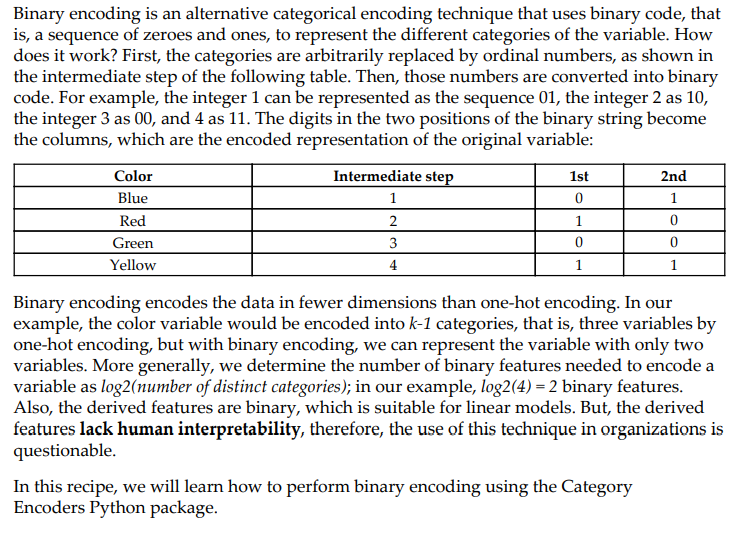

In [ ]:
from category_encoders import BinaryEncoder
encoder = BinaryEncoder(cols=['A6'], drop_invariant=True)
encoder.fit_transform(df.dropna())


### 10. Performing feature hashing

In [ ]:
from category_encoders import HashingEncoder
encoder = HashingEncoder(cols=['A6'], n_components=4)
encoder.fit_transform(df.dropna())
